# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_key)
newsapi

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language = "en",
)

bitcoin_news["totalResults"]

4879

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="Ethereum",
    language = "en"
)

eth_news["totalResults"]

1217

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bit_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
bit_df = pd.DataFrame(bit_sentiments)

bit_df.head()

,compound,negative,neutral,positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...


In [7]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

eth_df.head()

,compound,negative,neutral,positive,text
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...
3,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...


In [8]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.259685,0.012950,0.909600,0.077400
std,0.354036,0.032014,0.078891,0.074368
min,-0.585900,0.000000,0.781000,0.000000
25%,0.000000,0.000000,0.847000,0.000000
50%,0.237750,0.000000,0.900000,0.074000
75%,0.554250,0.000000,1.000000,0.139000
max,0.801600,0.103000,1.000000,0.209000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.075779,0.027421,0.925474,0.047105
std,0.285674,0.042871,0.069865,0.052851
min,-0.493900,0.000000,0.753000,0.000000
25%,0.000000,0.000000,0.873500,0.000000
50%,0.000000,0.000000,0.938000,0.052000
75%,0.213950,0.066500,1.000000,0.069000
max,0.636900,0.119000,1.000000,0.144000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [116]:
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabrinareed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sabrinareed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sabrinareed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [117]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [118]:
lemmatizer = WordNetLemmatizer()
# Complete the tokenizer function
def tokenizer(text):
   # """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub(' ', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens


In [119]:
# Create a new tokens column for bitcoin
bit_df['tokens'] = bit_df['text'].apply(tokenizer)
bit_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, ha, partnered, cryptocurrency, startup,..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, time, high, november, th,..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, work, come, close, cryptocu..."
4,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[securities, exchange, commission, plan, sue, ..."


In [120]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,"[securities, exchange, commission, plan, sue, ..."
1,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, wa, derided, serious, investor, bubb..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."
3,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representations, virtual, curren..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representations, virtual, curren..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [121]:
from collections import Counter
from nltk import ngrams

In [155]:
for bit_tokens in bit_df['tokens']:
    print(bit_tokens)

['visa', 'ha', 'partnered', 'cryptocurrency', 'startup', 'blockfi', 'offer', 'first', 'reward', 'credit', 'card', 'pay', 'bitcoin', 'rather', 'cash', 'worth', 'applying', 'unless', 'youre', 'extremely', 'bullish', 'char']
['reaching', 'previous', 'time', 'high', 'november', 'th', 'december', 'st', 'bitcoin', 'trading', 'well', 'ha', 'surpassed', 'previous', 'peak', 'price', 'bitcoins', 'value', 'ha', 'rapidly', 'char']
['almost', 'three', 'year', 'day', 'since', 'price', 'bitcoin', 'wa', 'close', 'breaking', 'ceiling', 'came', 'crashing', 'wednesday', 'arbitrary', 'milestone', 'hodlers', 'dream', 'wa', 'finally', 'char']
['everything', 'dumb', 'work', 'come', 'close', 'cryptocurrency', 'world', 'experiencing', 'another', 'late', 'year', 'surge', 'consumer', 'interest', 'price', 'climb', 'value', 'bitcoin', 'char']
['securities', 'exchange', 'commission', 'plan', 'sue', 'ripple', 'federal', 'civil', 'court', 'selling', 'unregistered', 'security', 'according', 'news', 'release', 'publish

In [156]:
# Generate the Bitcoin N-grams where N=2

bitcoin_counts = Counter(ngrams(bit_tokens, n=2))
print(dict(bitcoin_counts))

{('reuters', 'staff'): 1, ('staff', 'file'): 1, ('file', 'photo'): 1, ('photo', 'representations'): 1, ('representations', 'virtual'): 1, ('virtual', 'currency'): 1, ('currency', 'bitcoin'): 1, ('bitcoin', 'seen'): 1, ('seen', 'picture'): 1, ('picture', 'illustration'): 1, ('illustration', 'taken'): 1, ('taken', 'taken'): 1, ('taken', 'march'): 1, ('march', 'reuters'): 1, ('reuters', 'dado'): 1, ('dado', 'ruvic'): 1, ('ruvic', 'london'): 1, ('london', 'new'): 1, ('new', 'york'): 1, ('york', 'reuters'): 1, ('reuters', 'bitcoin'): 1, ('bitcoin', 'jum'): 1, ('jum', 'char'): 1}


In [157]:
for eth_tokens in eth_df['tokens']:
    print(eth_tokens)

['securities', 'exchange', 'commission', 'plan', 'sue', 'ripple', 'federal', 'civil', 'court', 'selling', 'unregistered', 'security', 'according', 'news', 'release', 'published', 'online', 'cryptocurrency', 'company', 'late', 'char']
['bitcoin', 'wa', 'derided', 'serious', 'investor', 'bubble', 'ponzi', 'scheme', 'year', 'ha', 'become', 'irresistible', 'investment', 'many', 'wednesday', 'bitcoin', 'topped', 'fo', 'char']
['file', 'photo', 'representation', 'virtual', 'currency', 'bitcoin', 'seen', 'front', 'stock', 'graph', 'illustration', 'taken', 'november', 'reuters', 'dado', 'ruvic', 'illustration', 'london', 'reuters', 'major', 'u', 'char']
['file', 'photo', 'representations', 'virtual', 'currency', 'bitcoin', 'seen', 'picture', 'illustration', 'taken', 'taken', 'march', 'reuters', 'dado', 'ruvic', 'illustration', 'london', 'reuters', 'major', 'u', 'cryptocurrency', 'char']
['file', 'photo', 'representations', 'virtual', 'currency', 'bitcoin', 'seen', 'picture', 'illustration', 't

In [158]:
# Generate the Ethereum N-grams where N=2
eth_counts = Counter(ngrams(eth_tokens, n=2))
print(dict(eth_counts))

{('december', 'min'): 1, ('min', 'read'): 1, ('read', 'article'): 1, ('article', 'wa'): 1, ('wa', 'translated'): 1, ('translated', 'spanish'): 1, ('spanish', 'edition'): 1, ('edition', 'using'): 1, ('using', 'ai'): 1, ('ai', 'technology'): 1, ('technology', 'errors'): 1, ('errors', 'may'): 1, ('may', 'exist'): 1, ('exist', 'due'): 1, ('due', 'process'): 1, ('process', 'yesterday'): 1, ('yesterday', 'wednesday'): 1, ('wednesday', 'bitcoin'): 1, ('bitcoin', 'surpassed'): 1, ('surpassed', 'char'): 1}


In [199]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return Counter(tokens).most_common(N)

In [211]:
# Get the top 10 words for Bitcoin
bit_word_counts = token_count(bit_tokens)
print(bit_word_counts)

[('reuters', 3), ('bitcoin', 2), ('taken', 2), ('staff', 1), ('file', 1), ('photo', 1), ('representations', 1), ('virtual', 1), ('currency', 1), ('seen', 1)]


In [212]:
# Get the top 10 words for Ethereum
eth_word_counts = token_count(eth_tokens)
print(eth_word_counts)

[('december', 1), ('min', 1), ('read', 1), ('article', 1), ('wa', 1), ('translated', 1), ('spanish', 1), ('edition', 1), ('using', 1), ('ai', 1)]


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

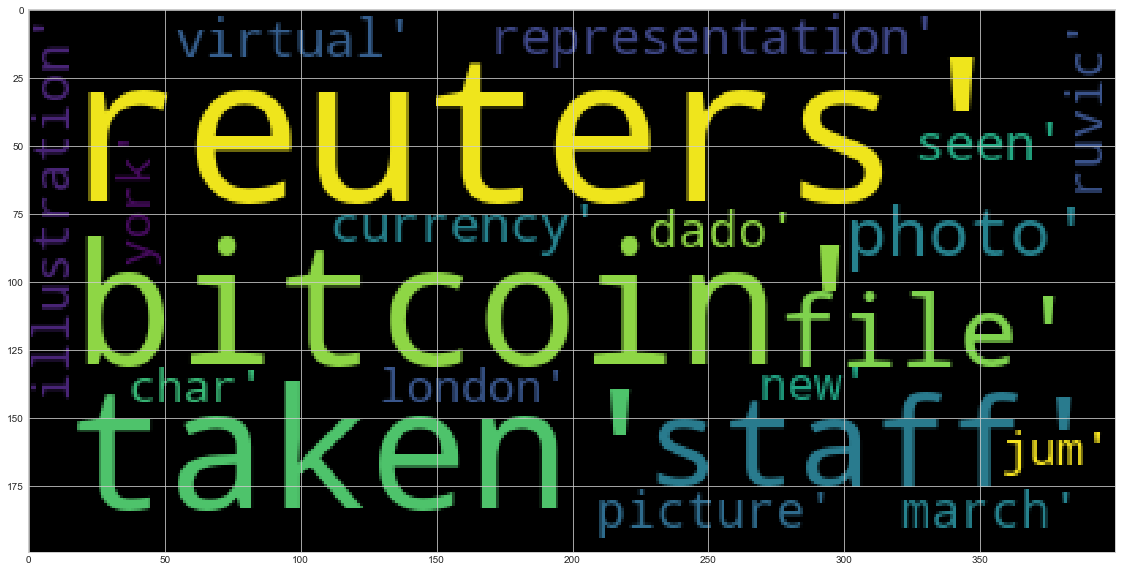

In [231]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bit_tokens)
bit_wc = tokenizer(big_string)
wc = WordCloud().generate(str(bit_wc))
plt.imshow(wc)

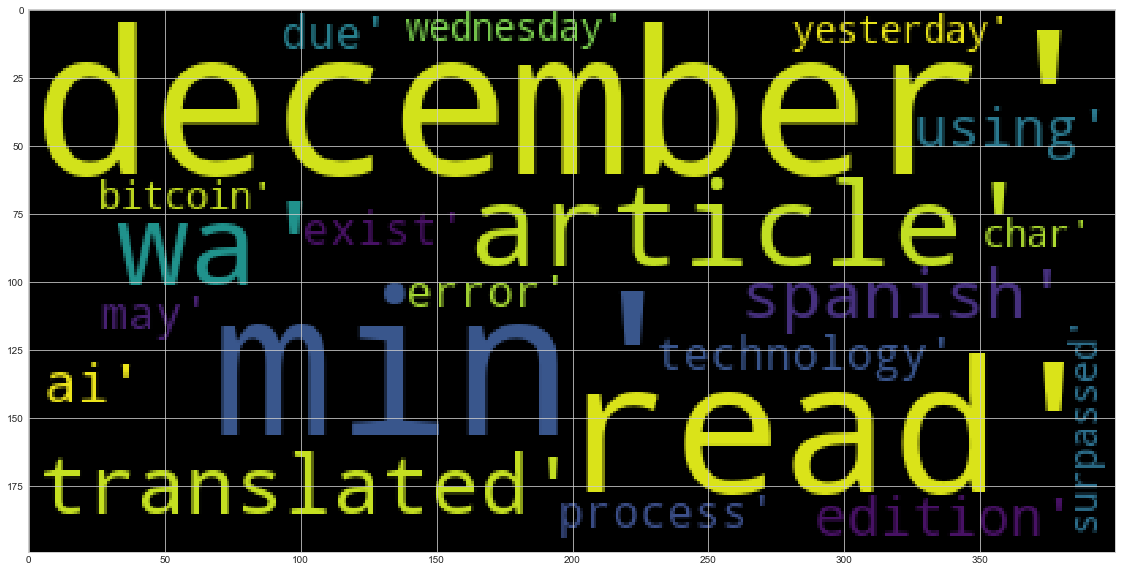

In [230]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_tokens)
eth_wc = tokenizer(big_string)
wc = WordCloud().generate(str(eth_wc))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [232]:
import spacy
from spacy import displacy

In [233]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [234]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [255]:
# Concatenate all of the bitcoin text together
doc = nlp(str(bit_df['text']))
displacy.render(doc, style='ent')

In [241]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [242]:
# Render the visualization
# YOUR CODE HERE!

In [258]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in bit_df['text']]
entities

[]

---

## Ethereum NER

In [259]:
# Concatenate all of the bitcoin text together
doc = nlp(str(eth_df['text']))
displacy.render(doc, style='ent')

In [245]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [246]:
# Render the visualization
# YOUR CODE HERE!

In [247]:
# List all Entities
# YOUR CODE HERE!